
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
dc = pd.read_csv('Ecommerce Customers.csv')
dc

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
dc.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
dc.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

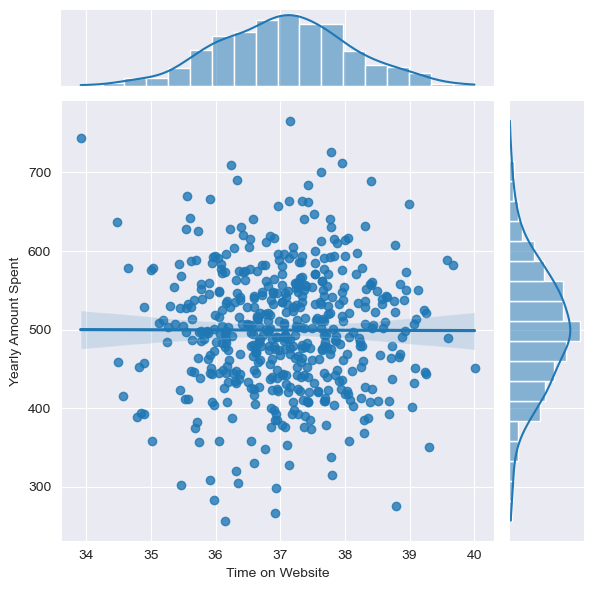

In [6]:
import scipy.stats as stats
sns.set_style('darkgrid')
sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = dc, kind = "reg")
#annotate(stats.pearsonr)
## Set kind="reg" to add a linear regression fit (using regplot()) and univariate KDE curves:

In [7]:
cor_matrix = dc.corr()
cor_matrix

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [8]:
cor_matrix["Yearly Amount Spent"]["Time on Website"]

-0.0026408446721577087

### Answer to the correlation question is: THERE IS NO CORRELATION BETWEEN THEM

### almost no relation between the two sets of data

** Do the same but with the Time on App column instead. **

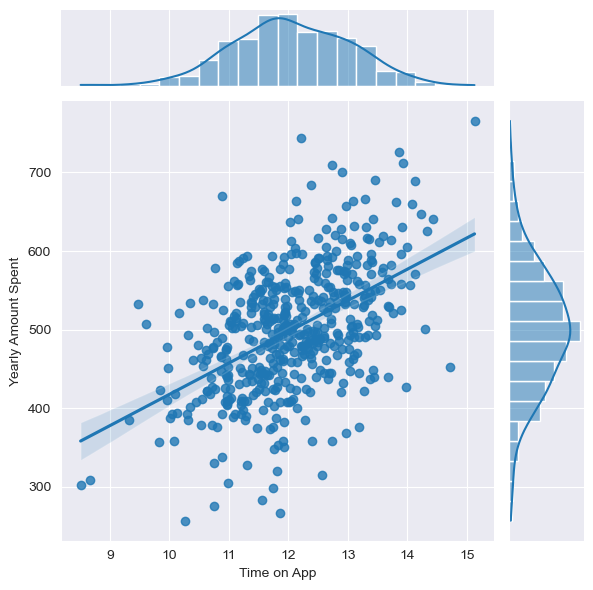

In [9]:
sns.set_style('darkgrid')
app = sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = dc, kind = "reg")
#app.plot_joint(sns.kdeplot, color="g", zorder=0, levels=6)
#app.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [10]:
cor_matrix["Yearly Amount Spent"]["Time on App"]

0.4993277700534506

#### there is a little positive correlation between the two varaible

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

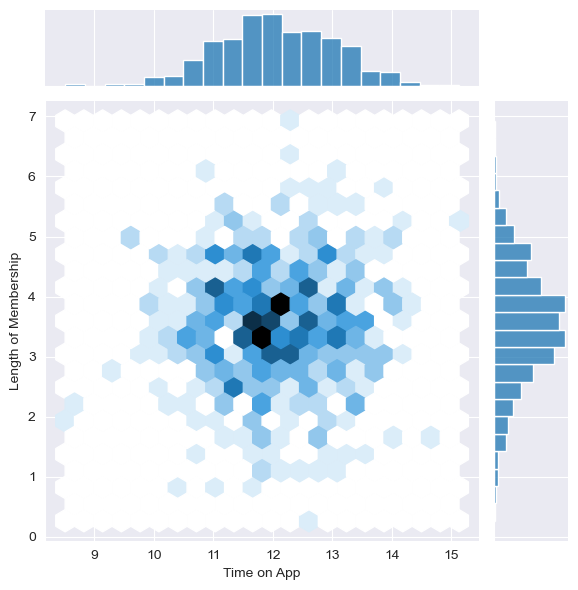

In [11]:
sns.set_style('darkgrid')
app_mem = sns.jointplot(x = "Time on App", y = "Length of Membership", data = dc, kind = "hex")
#app_mem.plot_joint(sns.kdeplot, color="g", zorder=0, levels=3)
#app.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

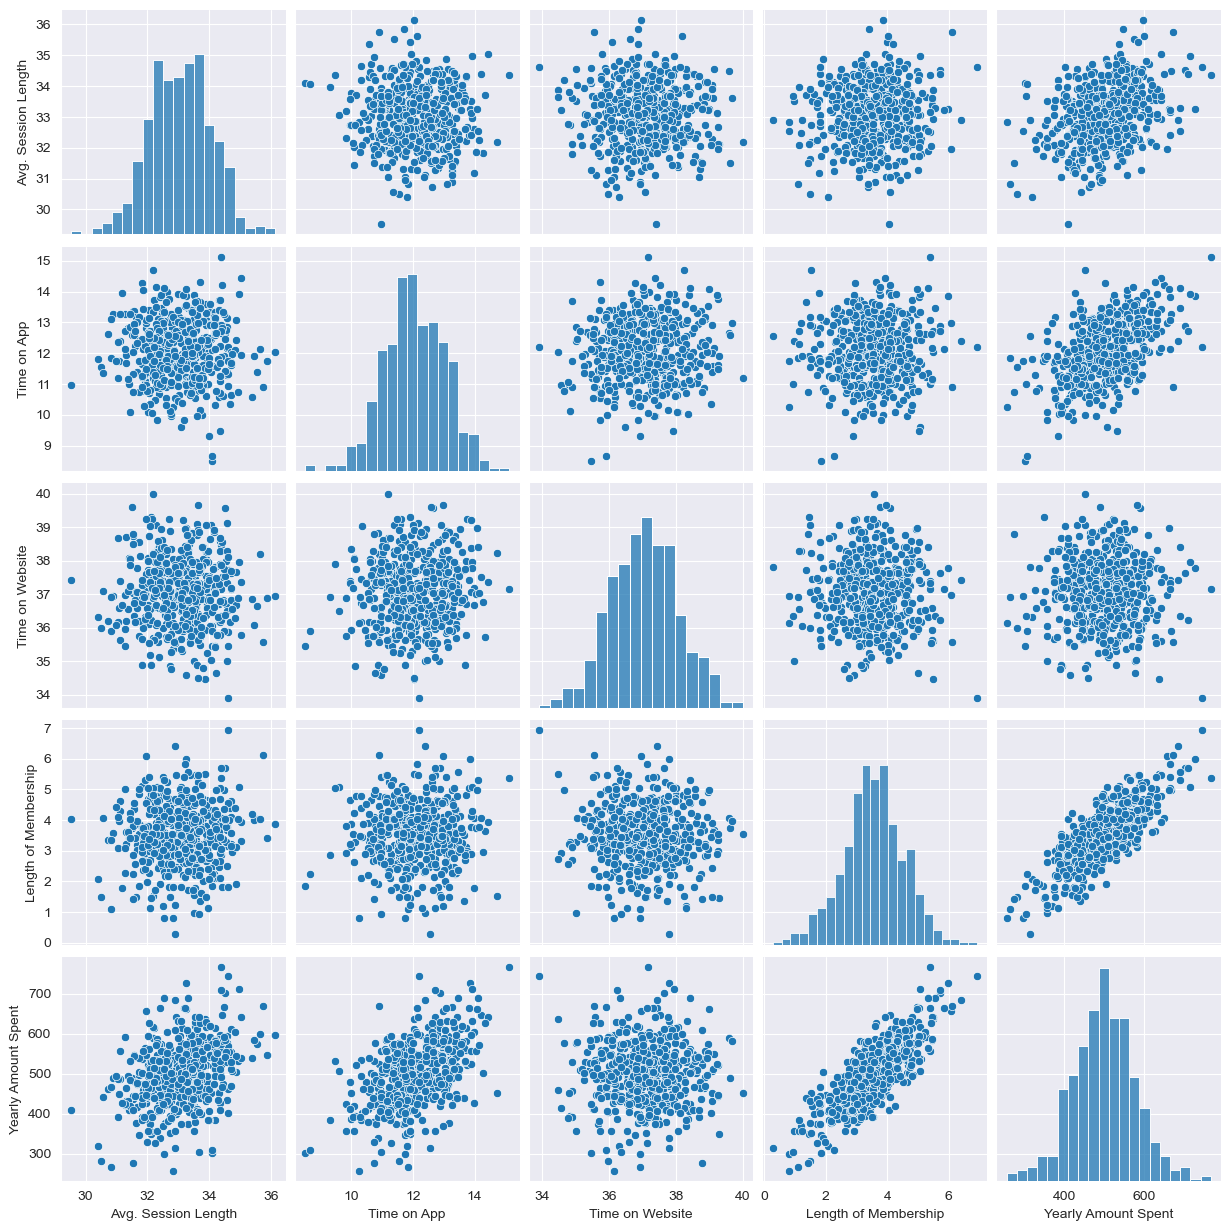

In [12]:
sns.pairplot(dc)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

### Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

In [11]:
#xlm = dc.loc[:,'Yearly Amount Spent'].values
#ylm = dc[['Length of Membership']]

In [13]:
x_YASpent = dc[["Yearly Amount Spent"]] ## TAKE GOOD CARE OF THE DOUBLE BRACKETS
x_YASpent.shape

(500, 1)

In [14]:
y_LOMShip = dc[["Length of Membership"]] ## TAKE GOOD CARE OF THE DOUBLE BRACKETS
y_LOMShip.shape

(500, 1)

In [15]:
# now importing the train test split function from seaborn libraries to train the model:
from sklearn.model_selection import train_test_split
## calling the function with trainnig data and testing data:
X_train, X_test, Y_train, Y_test = train_test_split(x_YASpent, y_LOMShip, test_size = 0.4, random_state = 0)

In [16]:
## now creating the algorithm model:
### first calling the linear regression algorithm:
from sklearn.linear_model import LinearRegression
year_member_model = LinearRegression()
## now fitting the train data togehter as inputs and outputs:
year_member_model.fit(X_train, Y_train)

LinearRegression()

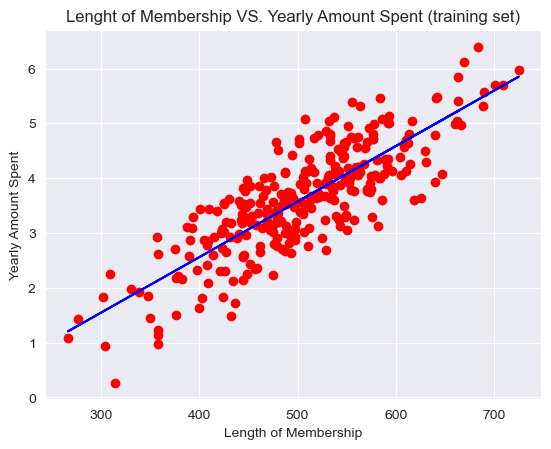

In [17]:
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, year_member_model.predict(X_train), color = "blue") # plotting the trianing data
##plt.scatter(X_train,  year_member_model.predict(X_train), color = "green")

plt.title("Lenght of Membership VS. Yearly Amount Spent (training set)")
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

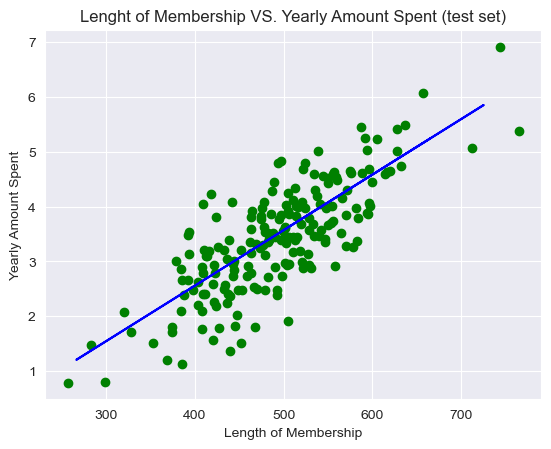

In [18]:
plt.scatter(X_test, Y_test, color = "green")
plt.plot(X_train, year_member_model.predict(X_train), color = "blue") # plotting the tested data
##plt.scatter(X_train,  year_member_model.predict(X_train), color = "green")

plt.title("Lenght of Membership VS. Yearly Amount Spent (test set)")
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

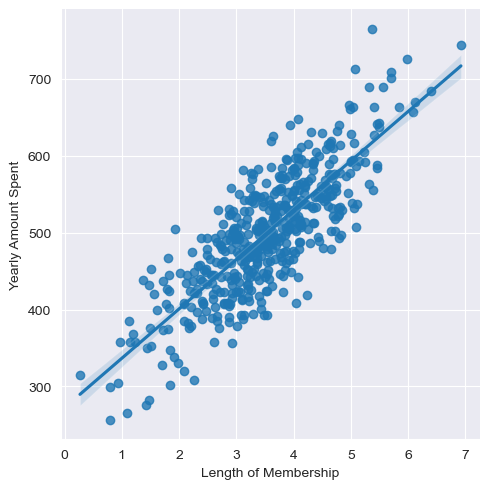

In [20]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = dc)

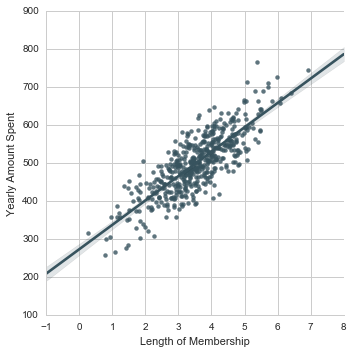

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [40]:
#dc.columns
X = dc[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
X.shape

(500, 4)

In [41]:
Y = dc[['Yearly Amount Spent']]
Y.shape

(500, 1)

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [31]:
## importing the train test split function from sklearn library:
from sklearn.model_selection import train_test_split
Xx_train, Xx_test, Yy_train, Yy_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [42]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [43]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [44]:
lm.fit(Xx_train, Yy_train)

LinearRegression()

**Print out the coefficients of the model**

In [45]:
print(lm.intercept_)

[-1047.93278225]


In [47]:
k = lm.intercept_
lm_coeff = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
lm_coeff

ValueError: Shape of passed values is (1, 4), indices imply (4, 1)

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [48]:
predict1 = lm.predict(Xx_test)

** Create a scatterplot of the real test values versus the predicted values. **

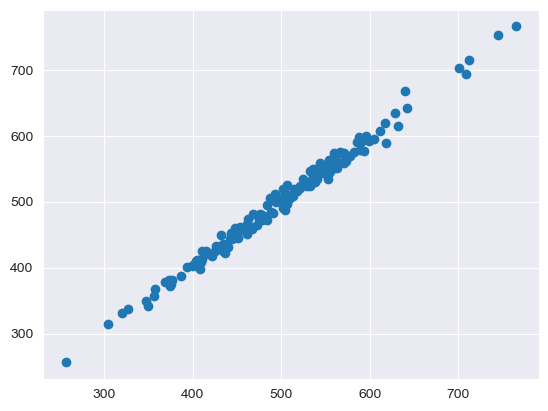

In [51]:
plt.scatter(Yy_test, predict1)

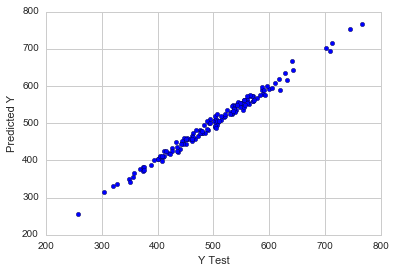

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [52]:
from sklearn import metrics

In [53]:
print("MAE: ", metrics.mean_absolute_error(Yy_test, predict1))

MAE:  7.228148653430853


In [54]:
print("MSE: ", metrics.mean_squared_error(Yy_test, predict1))

MSE:  79.81305165097484


In [56]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Yy_test, predict1)))

RMSE:  8.933815066978656


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

D:\ProgramfilesD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

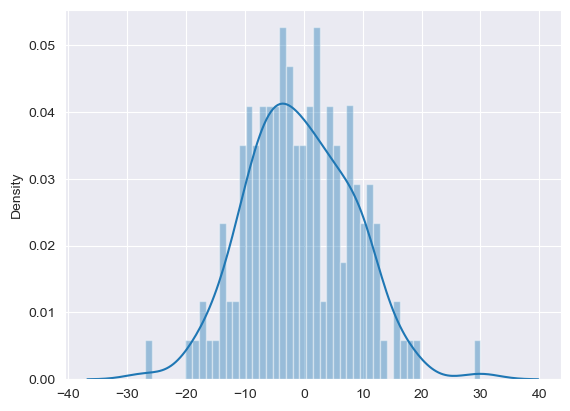

In [57]:
sns.distplot((Yy_test-predict1), bins = 50)

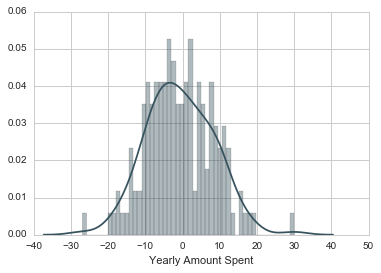

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

*Answer here*

**Do you think the company should focus more on their mobile app or on their website?**

*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.